In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import utilitarios as utils
import utilitarios as utils # Funciones propias
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import math
from sklearn.metrics import confusion_matrix
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import NuSVC
path_knn = 'Resultados/knn/'
path_radial_basis = 'Resultados/radial_basis_kernel/'
path_linear = 'Resultados/linear_kernel/'

random_seed = 2022 # Number of life :)

# KNN

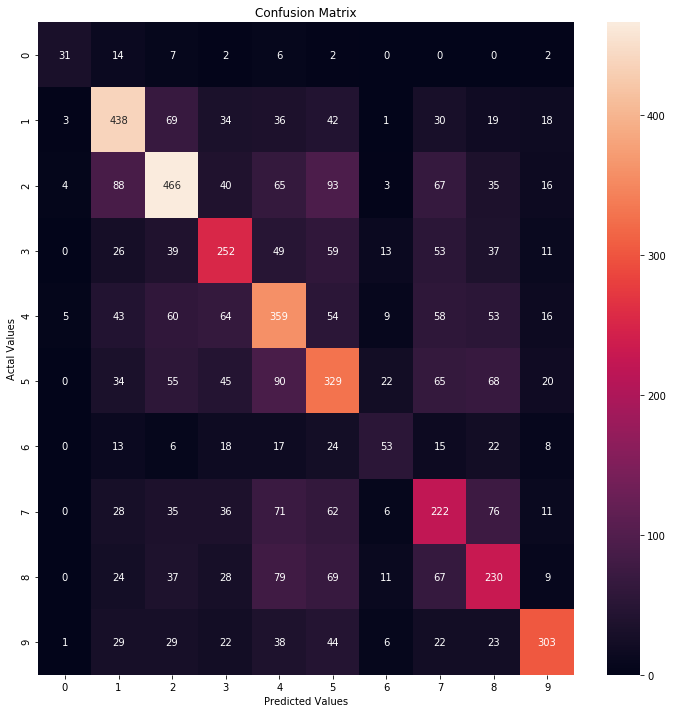

In [38]:
knn_non_stratified_k_fold = pd.read_csv(path_knn + 'non_stratified_k_fold.csv', index_col=0, sep=";")

knn_non_stratified_k_fold.sort_values(by='Test bias error', ascending = True, inplace = True)
knn_non_stratified_k_fold_mejor_modelo = knn_non_stratified_k_fold[:1]


cortes= (int(knn_non_stratified_k_fold_mejor_modelo['Number of cuts']))
number_of_folds = (int(knn_non_stratified_k_fold_mejor_modelo['Number of cuts']))
neighbor = (int(knn_non_stratified_k_fold_mejor_modelo['Neighbors']))

X, y, X_raw = utils.get_data(src_dir="Data_preprocesada/", iterations= cortes)

X = utils.normalization(X)
X_length = len(X[0])
k_folds_data = utils.get_non_stratified_k_fold_cross_validation(X, y, number_of_folds, random_seed)[0]

clf = KNeighborsClassifier(n_neighbors=neighbor)

clf.fit(k_folds_data['X_train'], k_folds_data['y_train'])
y_pred = clf.predict(k_folds_data['X_test'])

cm = confusion_matrix(k_folds_data['y_test'], y_pred)
cm_df = pd.DataFrame(cm)

plt.figure(figsize=(12,12))
sn.heatmap(cm_df, annot=True, fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

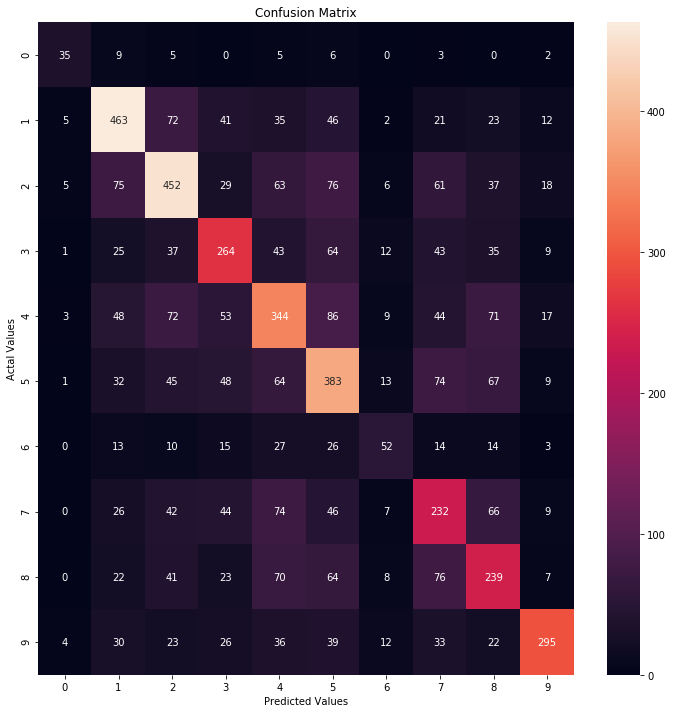

In [39]:
knn_stratified_k_fold = pd.read_csv(path_knn + 'stratified_k_fold.csv', index_col=0, sep=";")

knn_stratified_k_fold.sort_values(by='Test bias error', ascending = True, inplace = True)
knn_stratified_k_fold_mejor_modelo = knn_stratified_k_fold[:1]


cortes= (int(knn_stratified_k_fold_mejor_modelo['Number of cuts']))
number_of_folds = (int(knn_stratified_k_fold_mejor_modelo['Number of cuts']))
neighbor = (int(knn_stratified_k_fold_mejor_modelo['Neighbors']))

X, y, X_raw = utils.get_data(src_dir="Data_preprocesada/", iterations= cortes)

X = utils.normalization(X)
X_length = len(X[0])
k_folds_data = utils.get_stratified_k_fold_cross_validation(X, y, number_of_folds, random_seed)[0]

clf = KNeighborsClassifier(n_neighbors=neighbor)

clf.fit(k_folds_data['X_train'], k_folds_data['y_train'])
y_pred = clf.predict(k_folds_data['X_test'])

cm = confusion_matrix(k_folds_data['y_test'], y_pred)
cm_df = pd.DataFrame(cm)

plt.figure(figsize=(12,12))
sn.heatmap(cm_df, annot=True, fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

# Linear kernel

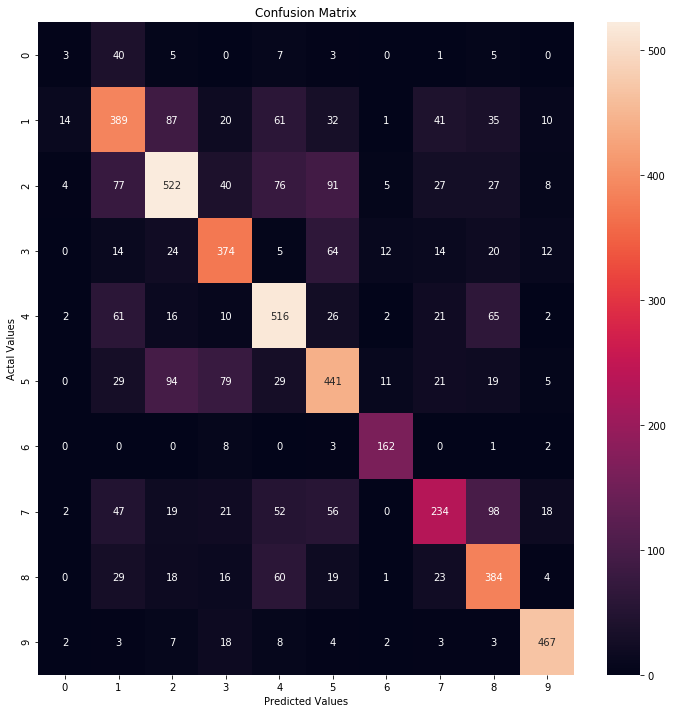

In [42]:
linear_non_stratified_k_fold = pd.read_csv(path_linear + 'non_stratified_k_fold.csv', index_col=0, sep=";")
linear_non_stratified_k_fold.sort_values(by='Test bias error', ascending = True, inplace = True)
linear_non_stratified_k_fold.head(10)


linear_non_stratified_k_fold_mejor_modelo = linear_non_stratified_k_fold.iloc[0]
# #eleccion en base de la mayor varianza dentro del top 10 menores bias. Buen trade-off


cortes= (int(linear_non_stratified_k_fold_mejor_modelo['Number of cuts']))
number_of_folds = (int(linear_non_stratified_k_fold_mejor_modelo['Number of cuts']))


clf = make_pipeline(StandardScaler(), 
                    LinearSVC(  dual= False,
                                random_state=random_seed))

X, y, X_raw = utils.get_data(src_dir="Data_preprocesada/", iterations= cortes)

X = utils.normalization(X)
X_length = len(X[0])
k_folds_data = utils.get_non_stratified_k_fold_cross_validation(X, y, number_of_folds, random_seed)[0]


clf.fit(k_folds_data['X_train'], k_folds_data['y_train'])
y_pred = clf.predict(k_folds_data['X_test'])

cm = confusion_matrix(k_folds_data['y_test'], y_pred)
cm_df = pd.DataFrame(cm)

plt.figure(figsize=(12,12))
sn.heatmap(cm_df, annot=True, fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()


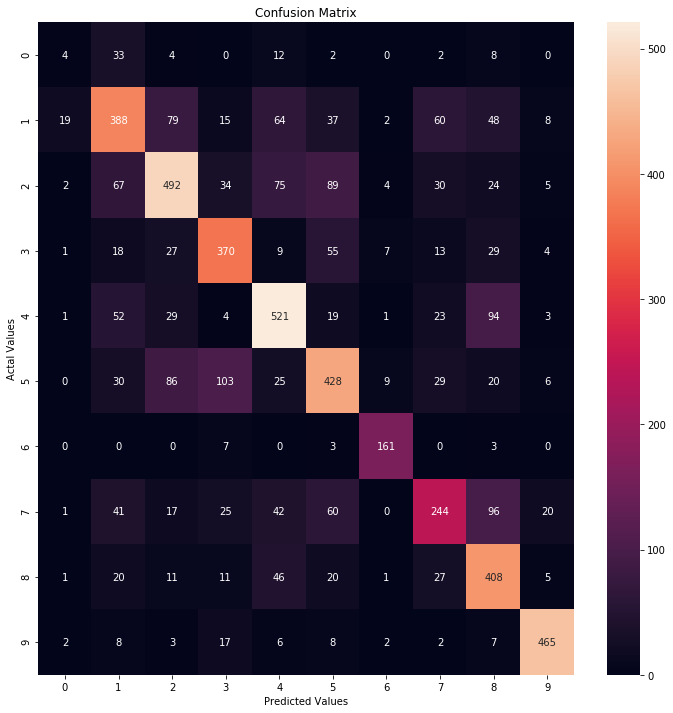

In [43]:
linear_stratified_k_fold = pd.read_csv(path_linear + 'stratified_k_fold.csv', index_col=0, sep=";")
linear_stratified_k_fold.sort_values(by='Test bias error', ascending = True, inplace = True)
linear_stratified_k_fold.head(10)


linear_stratified_k_fold_mejor_modelo = linear_stratified_k_fold.iloc[0]


cortes= (int(linear_stratified_k_fold_mejor_modelo['Number of cuts']))
number_of_folds = (int(linear_stratified_k_fold_mejor_modelo['Number of cuts']))


clf = make_pipeline(StandardScaler(), 
                    LinearSVC(  dual= False,
                                random_state=random_seed))

X, y, X_raw = utils.get_data(src_dir="Data_preprocesada/", iterations= cortes)

X = utils.normalization(X)
X_length = len(X[0])
k_folds_data = utils.get_stratified_k_fold_cross_validation(X, y, number_of_folds, random_seed)[0]


clf.fit(k_folds_data['X_train'], k_folds_data['y_train'])
y_pred = clf.predict(k_folds_data['X_test'])

cm = confusion_matrix(k_folds_data['y_test'], y_pred)
cm_df = pd.DataFrame(cm)

plt.figure(figsize=(12,12))
sn.heatmap(cm_df, annot=True, fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

# #eleccion en base de la mayor varianza dentro del top 10 menores bias. Buen trade-off

# Radial Basis Kernel

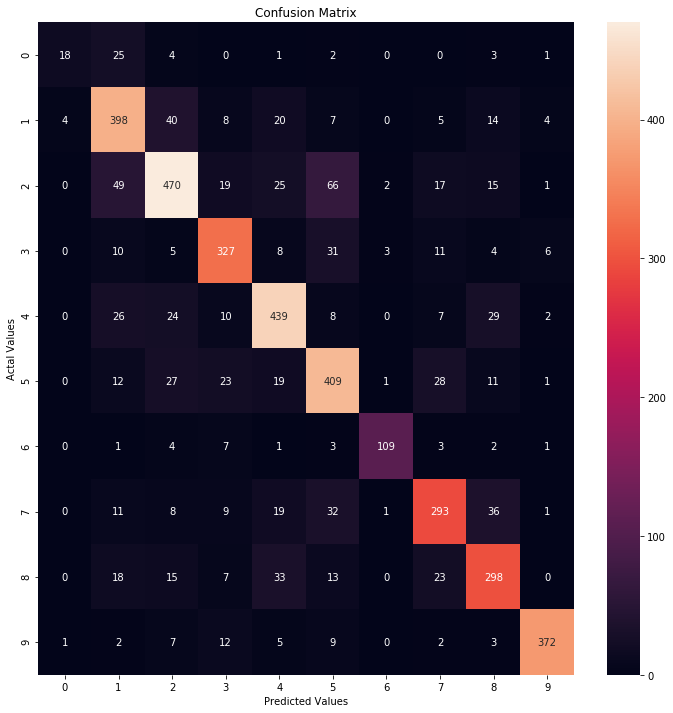

In [44]:
radial_basis_non_stratified_k_fold = pd.read_csv(path_radial_basis + 'non_stratified_k_fold.csv', index_col=0, sep=";")
radial_basis_non_stratified_k_fold.sort_values(by='Test bias error', ascending = True, inplace = True)
radial_basis_non_stratified_k_fold.head(10)


radial_basis_non_stratified_k_fold_mejor_modelo = radial_basis_non_stratified_k_fold.iloc[6]
# #eleccion en base de la mayor varianza dentro del top 10 menores bias. Buen trade-off


cortes= (int(radial_basis_non_stratified_k_fold_mejor_modelo['Number of cuts']))
number_of_folds = (int(radial_basis_non_stratified_k_fold_mejor_modelo['Number of cuts']))


clf = make_pipeline(StandardScaler(), 
                    NuSVC(nu=0.10,kernel='rbf', class_weight = 'balanced',
                    random_state=random_seed, decision_function_shape='ovr', break_ties=True))

           

X, y, X_raw = utils.get_data(src_dir="Data_preprocesada/", iterations= cortes)

X = utils.normalization(X)
X_length = len(X[0])
k_folds_data = utils.get_non_stratified_k_fold_cross_validation(X, y, number_of_folds, random_seed)[0]


clf.fit(k_folds_data['X_train'], k_folds_data['y_train'])
y_pred = clf.predict(k_folds_data['X_test'])

cm = confusion_matrix(k_folds_data['y_test'], y_pred)
cm_df = pd.DataFrame(cm)

plt.figure(figsize=(12,12))
sn.heatmap(cm_df, annot=True, fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()


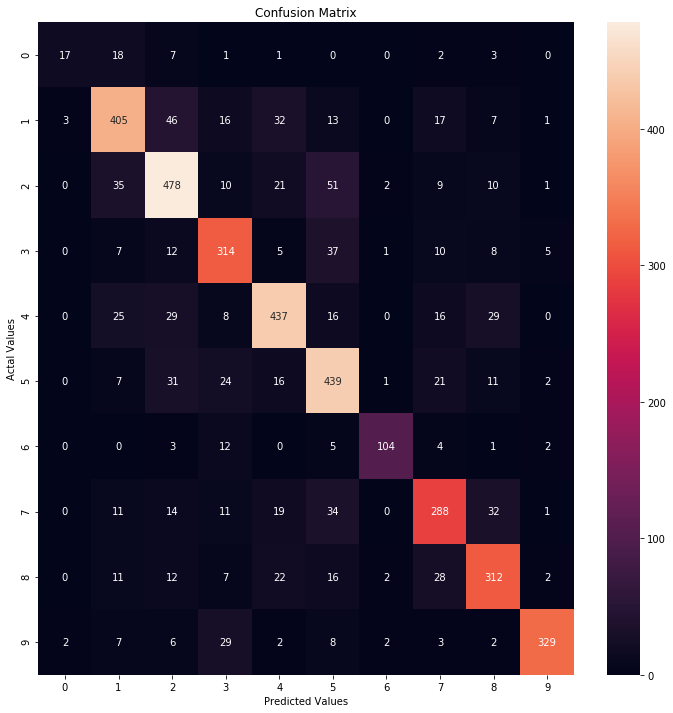

In [45]:
radial_basis_stratified_k_fold = pd.read_csv(path_radial_basis + 'stratified_k_fold.csv', index_col=0, sep=";")

radial_basis_stratified_k_fold.sort_values(by='Test bias error', ascending = True, inplace = True)
radial_basis_stratified_k_fold.head(10)


radial_basis_stratified_k_fold_mejor_modelo = radial_basis_stratified_k_fold.iloc[2]
# # #eleccion en base de la mayor varianza dentro del top 10 menores bias. Buen trade-off



radial_basis_non_stratified_k_fold = pd.read_csv(path_radial_basis + 'non_stratified_k_fold.csv', index_col=0, sep=";")
radial_basis_non_stratified_k_fold.sort_values(by='Test bias error', ascending = True, inplace = True)
radial_basis_non_stratified_k_fold.head(10)


radial_basis_non_stratified_k_fold_mejor_modelo = radial_basis_non_stratified_k_fold.iloc[6]
# #eleccion en base de la mayor varianza dentro del top 10 menores bias. Buen trade-off


cortes= (int(radial_basis_non_stratified_k_fold_mejor_modelo['Number of cuts']))
number_of_folds = (int(radial_basis_non_stratified_k_fold_mejor_modelo['Number of cuts']))


clf = make_pipeline(StandardScaler(), 
                    NuSVC(nu=0.10,kernel='rbf', class_weight = 'balanced',
                    random_state=random_seed, decision_function_shape='ovr', break_ties=True))

           

X, y, X_raw = utils.get_data(src_dir="Data_preprocesada/", iterations= cortes)

X = utils.normalization(X)
X_length = len(X[0])
k_folds_data = utils.get_stratified_k_fold_cross_validation(X, y, number_of_folds, random_seed)[0]


clf.fit(k_folds_data['X_train'], k_folds_data['y_train'])
y_pred = clf.predict(k_folds_data['X_test'])

cm = confusion_matrix(k_folds_data['y_test'], y_pred)
cm_df = pd.DataFrame(cm)

plt.figure(figsize=(12,12))
sn.heatmap(cm_df, annot=True, fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()